# Deteksi Penyakit Liver 

Dataset ini memiliki **579** data pasien dengan berbagai variabel dan kategori kelas setiap pasien. Variabel yang dimaksud di sini seperti Gender, Age, Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Proteins, Albumin dan Albumin & Globulin Ratio. Kesepuluh fitur ini adalah fitur yang akan digunakan dalam menemukan pola pada data, sedangkan Dataset merupakan fitur target.

# Tahap Preprocessing

In [50]:
import pickle
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_validate
import seaborn as sns

# Baca Dataset

In [51]:
data = pd.read_csv('indian_liver_patient.csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
574,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**Exploratory Data Analysis(EDA)**

Tahapan ini bertujuan untuk memahami data, melalui diskripsi data maupun secara visualisasi.


In [52]:
#EDA deskripsi variabel 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    int64  
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 49.9 KB


Variabel-variabel pada *Indian Patient Liver* dataset dapat dijelaskan sebagai berikut.
- *Age* : Usia pasien
- *Gender* :Jenis kelamin pasien
- *Total Bilirubin* : Jumlah sel darah merah dihati (mg/dl) 
- *Direct Bilirubin* : Bilirubin bebas (mg/dl)
- *Alkaline Phosphotase* : Enzim yang terkandung dari usus
- *Alamine Aminotransferase* : Enzim yang terkandung didalam hati
- *Aspartate Aminotransferase* : Enzim protein yang berada didalam hati
- *Total Protiens* : Serum protein yang terdapat didalam hati (g/dl)
- *Albumin* : Sintesa protein didalam hati
- *Albumin and Globulin Ratio* : Menunjukkan perbandingan rasio albumin dan globulin didalam hati
- *Dataset / Class* : Kategori kelas pasien yang menderita dan tidak menderita penyakit Liver.

In [53]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Berdasarkan hasil dari diskripsi data tersebut, menunjukkan bahwa ;
1. Rata-rata usia pasien terindikasi penyakit Liver yaitu 44 tahun, dimana pasien yang paling tertua berusia 90 tahun.
2. Rata-rata total kadar bilirubin dalam tubuh pasien yaitu sebesar 3,3 g/mol, dimana yang paling tertinggi yaitu 75 g/mol. 
3. Sedangkan rata-rata kadar albumin pasien yaitu sebesar 3,13 mg/dl dan yang tertinggi sebesar 5,50 mg/dl, dimana kisaran normal albumin adalah 0-8 mg/dl.


In [54]:
data.isnull().sum() #cek missing value atau data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Ternyata tidak terdapat data yang missing value pada data tersebut. Langkah selanjutnya yaitu melakukan EDA Univariate Analysis.

**EDA Univariate Analysis**

Text(0.5, 1.0, 'PROPORSI JENIS KELAMIN PASIEN(%)')

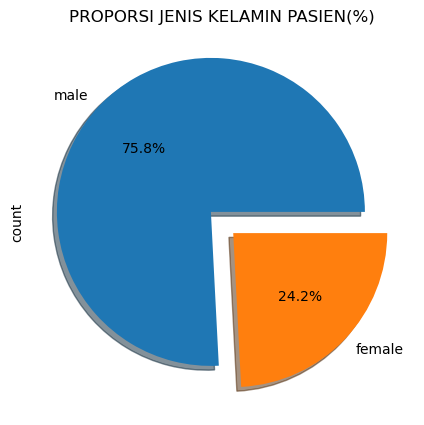

In [55]:
import matplotlib.pyplot as plt
labels = 'male','female'
data['Gender'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI JENIS KELAMIN PASIEN(%)")

Grafik tersebut memberikan informasi bahwa 75,8% pasien berjenis kelamin laki-laki, sedangkan 24,2% lainnya merupakan perempuan.

Text(0.5, 1.0, 'PROPORSI KATEGORI PASIEN(%)')

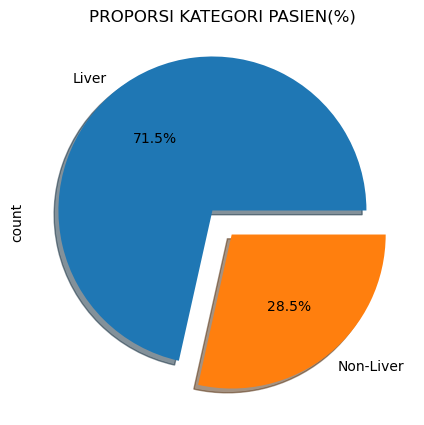

In [56]:
labels1 = 'Liver','Non-Liver'
data['Dataset'].value_counts().plot.pie(explode=[0.1,0.1],labels=labels1, autopct='%1.1f%%',shadow=True,figsize=(5,5));
plt.title("PROPORSI KATEGORI PASIEN(%)")

Sedangkan untuk Grafik Proporsi Kategori Pasien menjelaskan 71,1% merupakan pasien yang terindikasi menderita penyakit Liver, sedangkan 28,5% pasien tidak terindikasi penyakit Liver.

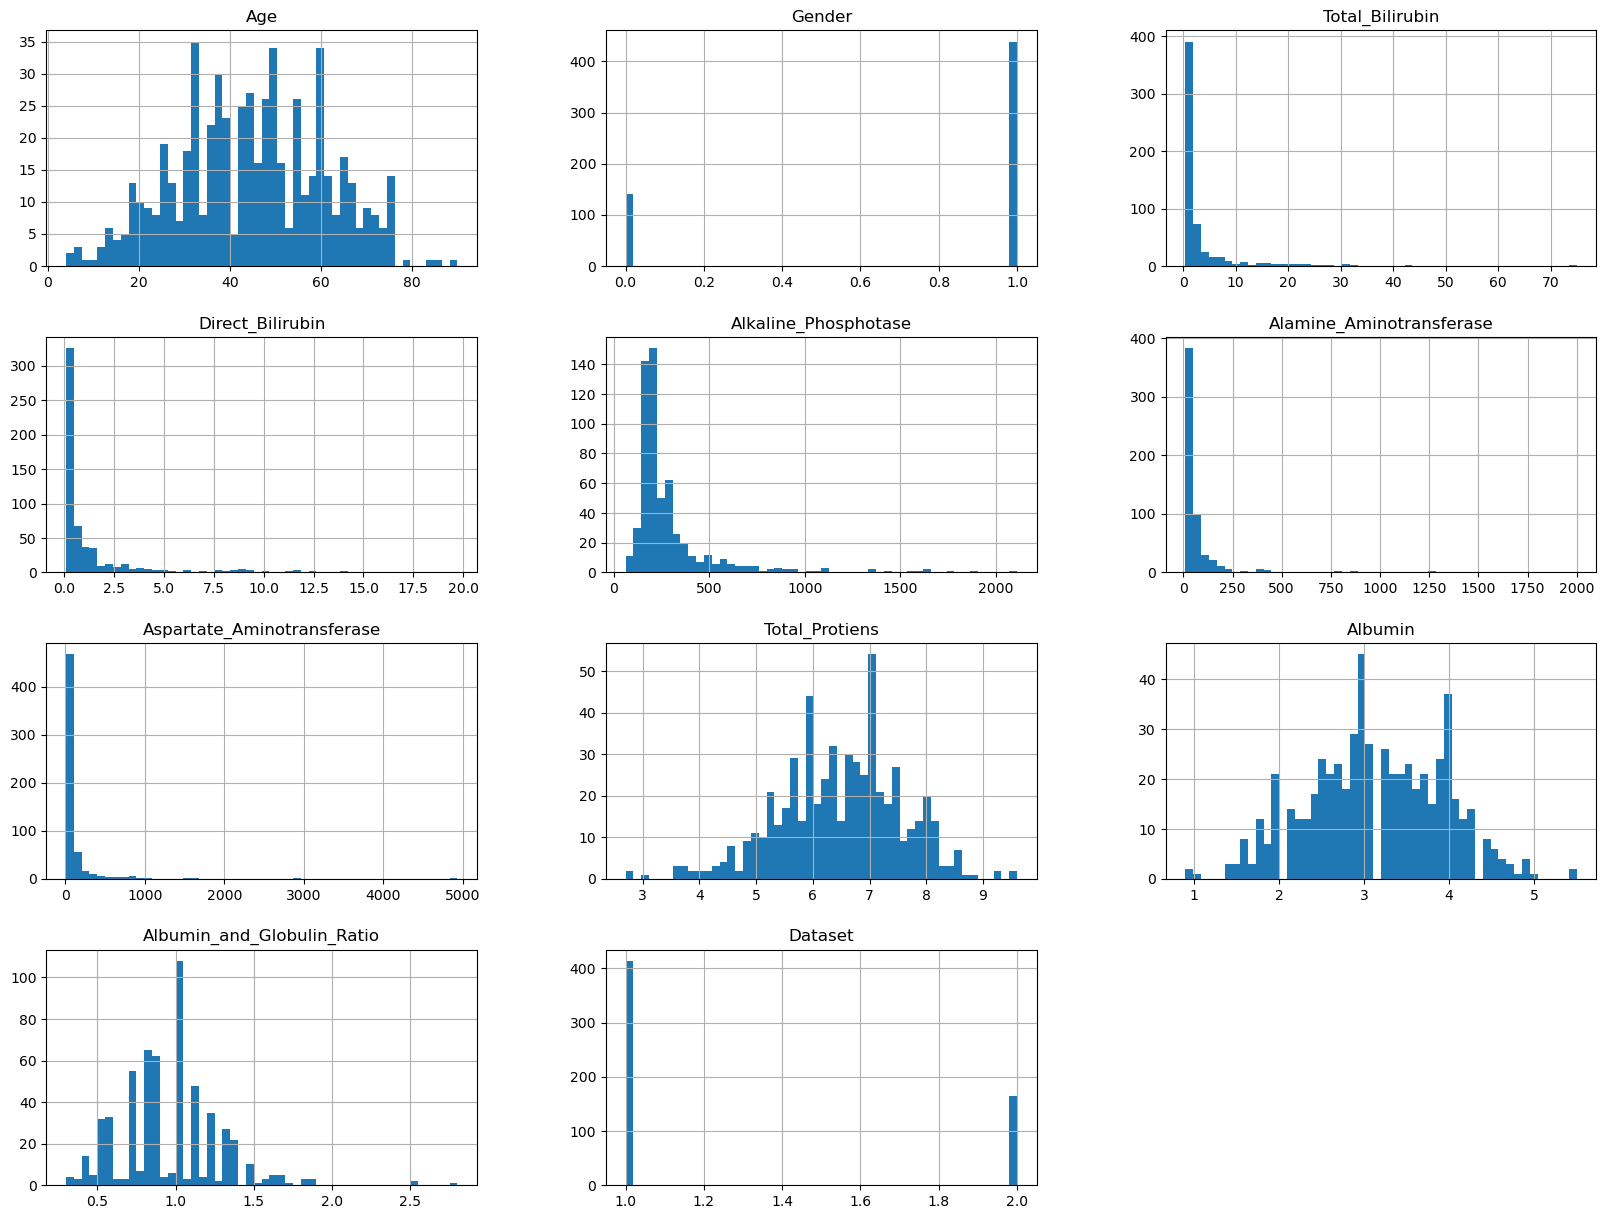

In [57]:
#numerical features
data.hist(bins=50, figsize=(20,15))
plt.show()

Informasi yang ditunjukkan pada Histogram diatas yaitu :

- Variabel *Age, Total Proteins, Albumin* dan *Albumin and Globulin Ratio* memiliki distribusi data hampir mendekai distribusi normal
- Sedangkan pada variabel *Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase* memiliki distribusi yang miring (*skewness*) ke kanan. 
Untuk 

# Data Preparation

Data *preparation* atau biasa disebut sebagai tahapan data *preprocessing* merupakan tahapan yanng dilakukan karena dapat memberikan fungsi atau manfaat pada data mining. Proses ini utamanya dilakukan untuk memastikan kualitas data baik sebelum digunakan saat analisis data.

In [58]:
# AMBIL LABEL SETIAP BARIS
label = data.iloc[:,-1:].values.ravel()
label

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,

In [59]:
# AMBIL FEATURE DATA
feature = data.iloc[:,:-1]
feature.values

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [60]:
# PEMBAGIAN DATA LATIH DAN DATA UJI SEBANYAK 80% UNTUK DATA LATIH 20% UNTUK DATA TEST
X_train, X_test, y_train, y_test = train_test_split(feature, label ,test_size=0.3)

In [61]:
print("Jumlah Data Latih:", len(X_train))
print("Jumlah Data Uji:", len(X_test))

Jumlah Data Latih: 405
Jumlah Data Uji: 174


# Pemodelan Dengan KNN

In [62]:
# PEMODELAN MENGGUNAKAN KNN
clf = KNeighborsClassifier(n_neighbors=3)

# FITTING DATA TRAINING
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Prediksi Hasil

In [63]:
pred = clf.predict(X_test)
pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [64]:
cols = {
    'Y True' : y_test,
    'Predict' : pred,
}

print("Prediksi Yang Dihasilkan")
pd.DataFrame(cols)

Prediksi Yang Dihasilkan


,Y True,Predict
0,1,1
1,2,1
2,1,1
3,1,1
4,1,1
...,...,...
169,1,1
170,1,1
171,1,1
172,2,1


# Pengukuran Performance

In [65]:
# FOLD = 10
kfold = KFold(n_splits=10)
scores = ['accuracy', 'precision', 'recall']
results = cross_validate(clf, X_test, y_test, cv=kfold, scoring=scores, return_train_score=True)
results_data = pd.DataFrame(results)
results_data

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.010863,0.007200,0.666667,0.801282,0.833333,0.831858,0.714286,0.886792
1,0.000000,0.008092,0.666667,0.820513,0.750000,0.844828,0.750000,0.907407
2,0.008236,0.000000,0.555556,0.833333,0.583333,0.855932,0.700000,0.918182
3,0.000000,0.008027,0.777778,0.814103,0.833333,0.831933,0.833333,0.916667
4,0.004008,0.002459,0.764706,0.808917,0.714286,0.827869,1.000000,0.918182
5,0.000000,0.004511,0.294118,0.815287,0.307692,0.850000,0.571429,0.902655
6,0.000000,0.008000,0.588235,0.828025,0.818182,0.849558,0.642857,0.905660
7,0.000000,0.000000,0.588235,0.815287,0.818182,0.846847,0.642857,0.886792
8,0.000000,0.020670,0.823529,0.789809,1.000000,0.819820,0.812500,0.875000
9,0.000000,0.003511,0.647059,0.821656,0.692308,0.846154,0.818182,0.908257


In [66]:
print("PERFORMANCE MODEL KNN")

accuracy = results_data.test_accuracy.mean() * 100
precision = results_data.test_precision.mean() * 100
recall = results_data.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f " % precision, "%")
print("Recall : %0.2f " % recall, "%")

PERFORMANCE MODEL KNN
Accuracy : 63.73 %
Precision : 73.51  %
Recall : 74.85  %


In [67]:
pickle.dump(clf, open('model_new.pkl','wb'))